In [1]:
%cd ..

/home/pill/lung/diffusion-anomaly-detection


In [2]:
%pwd

'/home/pill/lung/diffusion-anomaly-detection'

In [3]:
import numpy as np
import pandas as pd
import blobfile as bf
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, Dataset

ModuleNotFoundError: No module named 'blobfile'

In [ ]:
df = pd.read_csv('./data/chexpert.csv', header=None)
df

,0,1,2
0,data/chexpert/training/diseased/patient00122_s...,data/chexpert/training/diseased/patient00122_s...,0
1,data/chexpert/training/diseased/patient00124_s...,data/chexpert/training/diseased/patient00124_s...,0
2,data/chexpert/training/diseased/patient00128_s...,data/chexpert/training/diseased/patient00128_s...,0
3,data/chexpert/training/healthy/patient00485_st...,data/chexpert/training/healthy/patient00485_st...,1
4,data/chexpert/training/healthy/patient00486_st...,data/chexpert/training/healthy/patient00486_st...,1
5,data/chexpert/training/healthy/patient00488_st...,data/chexpert/training/healthy/patient00488_st...,1


In [ ]:
df[0].tolist()

['data/chexpert/training/diseased/patient00122_study6.npy',
 'data/chexpert/training/diseased/patient00124_study2.npy',
 'data/chexpert/training/diseased/patient00128_study3.npy',
 'data/chexpert/training/healthy/patient00485_study2.npy',
 'data/chexpert/training/healthy/patient00486_study1.npy',
 'data/chexpert/training/healthy/patient00488_study1.npy']

In [ ]:
['diseased' if c==0 else 'healthy' for c in df[2].tolist()]

['diseased', 'diseased', 'diseased', 'healthy', 'healthy', 'healthy']

(256, 256, 1)


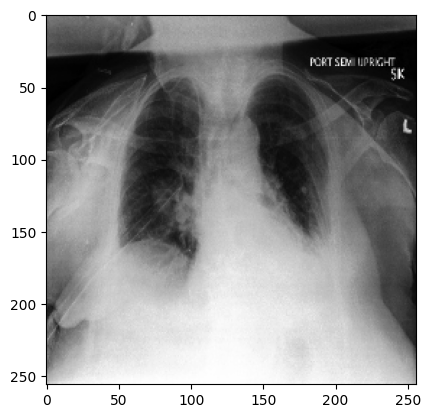

In [ ]:
lung = np.load('data/chexpert/training/diseased/patient00122_study6.npy')
print(lung.shape)
plt.imshow(lung, cmap='gray')
plt.show()

(512, 512, 1)


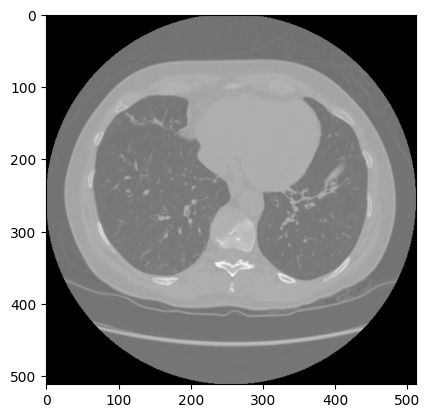

In [ ]:
lungCT = np.load('./data/Image/LIDC-IDRI-0002/0002_slice074_0.npy')
lungCT = np.array([lungCT])
# data/Image/LIDC-IDRI-0002/0002_slice074_0.npy
lungCT = np.transpose(lungCT, [1, 2, 0])
print(lungCT.shape)
plt.imshow(lungCT, cmap='gray')
plt.show()

(512, 512, 1)


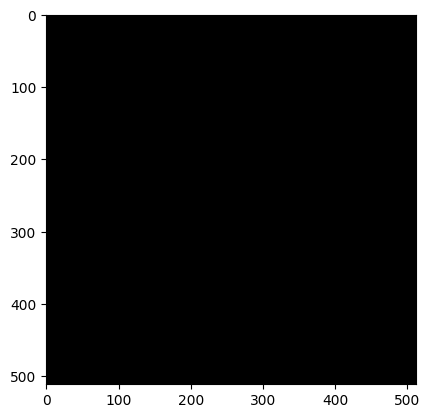

In [ ]:
lungCT = np.load('./data/Mask/LIDC-IDRI-0002/0002_slice074_0.npy')
lungCT = np.array([lungCT])
# data/Image/LIDC-IDRI-0002/0002_slice074_0.npy
lungCT = np.transpose(lungCT, [1, 2, 0])
print(lungCT.shape)
plt.imshow(lungCT, cmap='gray')
plt.show()

(512, 512, 1)


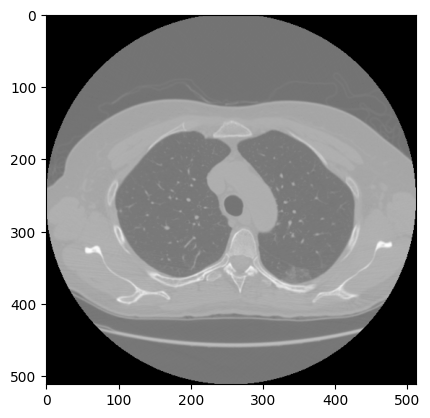

In [ ]:
lungCT = np.load('./data/Image/LIDC-IDRI-0002/0002_slice188_1.npy')
lungCT = np.array([lungCT])
# data/Image/LIDC-IDRI-0002/0002_slice074_0.npy
lungCT = np.transpose(lungCT, [1, 2, 0])
print(lungCT.shape)
plt.imshow(lungCT, cmap='gray')
plt.show()

(512, 512, 1)


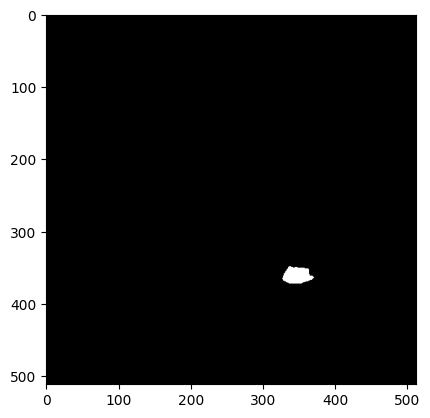

In [ ]:
lungCT = np.load('./data/Mask/LIDC-IDRI-0002/0002_slice188_1.npy')
lungCT = np.array([lungCT])
# data/Image/LIDC-IDRI-0002/0002_slice074_0.npy
lungCT = np.transpose(lungCT, [1, 2, 0])
print(lungCT.shape)
plt.imshow(lungCT, cmap='gray')
plt.show()

In [ ]:
def _list_image_files_recursively(data_dir):
    results = []
    for entry in sorted(bf.listdir(data_dir)):
        full_path = bf.join(data_dir, entry)
        ext = entry.split(".")[-1]
        if "." in entry and ext.lower() in ["jpg", "jpeg", "png", "gif", "npy"]:
            results.append(full_path)
        elif bf.isdir(full_path):
            results.extend(_list_image_files_recursively(full_path))
    return results
